In [1]:
#Installing necessary libraries
!pip install opencv-python


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Installing important packages and modules
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton

In [3]:
img = cv.imread("Football.JPG")
assert img is not None, "filecould not be read, check with os.path.exists()"

In [4]:
img

array([[[ 37,  40,  48],
        [ 42,  45,  53],
        [ 43,  49,  56],
        ...,
        [ 55,  55,  55],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 40,  43,  51],
        [ 44,  47,  55],
        [ 46,  52,  59],
        ...,
        [ 59,  59,  59],
        [ 58,  57,  59],
        [ 56,  58,  58]],

       [[ 41,  46,  55],
        [ 47,  52,  61],
        [ 52,  57,  66],
        ...,
        [ 63,  65,  66],
        [ 62,  63,  67],
        [ 59,  63,  64]],

       ...,

       [[ 52, 137,  93],
        [ 45, 130,  86],
        [ 40, 125,  81],
        ...,
        [ 53, 127,  85],
        [ 57, 130,  90],
        [ 57, 130,  90]],

       [[ 58, 140,  97],
        [ 60, 142,  99],
        [ 51, 133,  90],
        ...,
        [ 58, 132,  90],
        [ 64, 137,  97],
        [ 64, 137,  97]],

       [[ 52, 134,  91],
        [ 60, 142,  99],
        [ 49, 131,  88],
        ...,
        [ 57, 131,  89],
        [ 52, 125,  85],
        [ 52, 125,  85]]

In [5]:
px = img[100,100]
print(px)

[57 63 68]


In [6]:
#accessing only blue pixels
blue = img[100,100,0]
print(blue)

57


In [7]:
#Modifying the pixel values
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


In [8]:
# Better pixel accessing and editing method
#accessing Red value
img.item(10,10,2)

50

In [9]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [10]:
img

array([[[ 37,  40,  48],
        [ 42,  45,  53],
        [ 43,  49,  56],
        ...,
        [ 55,  55,  55],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 40,  43,  51],
        [ 44,  47,  55],
        [ 46,  52,  59],
        ...,
        [ 59,  59,  59],
        [ 58,  57,  59],
        [ 56,  58,  58]],

       [[ 41,  46,  55],
        [ 47,  52,  61],
        [ 52,  57,  66],
        ...,
        [ 63,  65,  66],
        [ 62,  63,  67],
        [ 59,  63,  64]],

       ...,

       [[ 52, 137,  93],
        [ 45, 130,  86],
        [ 40, 125,  81],
        ...,
        [ 53, 127,  85],
        [ 57, 130,  90],
        [ 57, 130,  90]],

       [[ 58, 140,  97],
        [ 60, 142,  99],
        [ 51, 133,  90],
        ...,
        [ 58, 132,  90],
        [ 64, 137,  97],
        [ 64, 137,  97]],

       [[ 52, 134,  91],
        [ 60, 142,  99],
        [ 49, 131,  88],
        ...,
        [ 57, 131,  89],
        [ 52, 125,  85],
        [ 52, 125,  85]]

# Accessing image properties


In [11]:
# Shape of an image
print(img.shape)

(280, 450, 3)


In [12]:
# Image datatype
print(img.dtype)

uint8


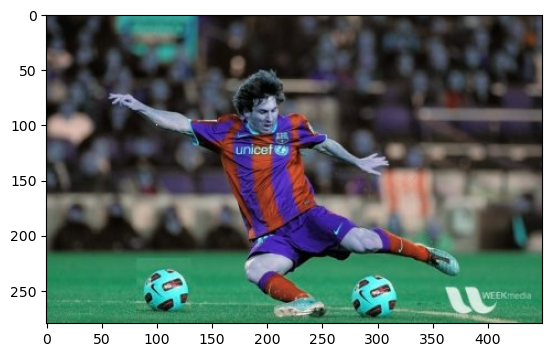

In [13]:
plt.imshow(img)
plt.show()

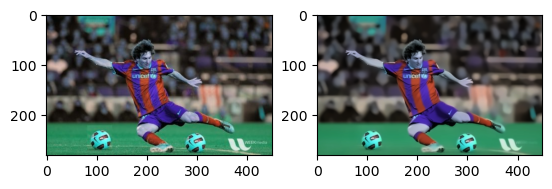

In [14]:
#denoising colored image
dst = cv.fastNlMeansDenoisingColored(img,None, 10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [15]:
#converting the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [16]:
# Create a kernel
kernel = np.array([1,1,1])

In [17]:
# Apply the kernel to the image
filtered_image = cv.filter2D(gray, -1, kernel)

In [18]:
#Display the filtered image
cv.imshow("Original Image", img)
cv.imshow('Filtered Image', filtered_image)
cv.waitKey(0)
cv.destroyAllWindows

<function destroyAllWindows>


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


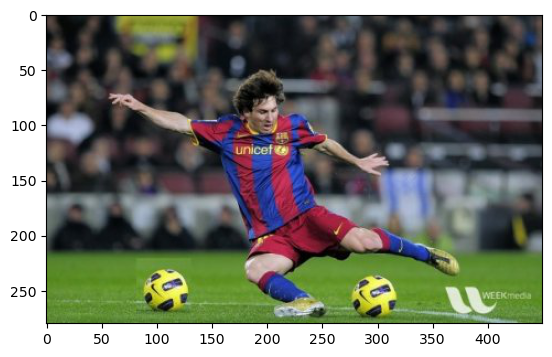

In [22]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
!pip install PyQt5
!pip install PySide2



def onclick(event):
    if event.button == MouseButton.LEFT:
        print(f"Pixel coordinates: ({event.xdata:.2f}, {event.ydata:.2f})")

# Read the image
img = plt.imread("Football.JPG")

# Create a figure and display the image using the Qt backend
fig, ax = plt.subplots()
ax.imshow(img)

# Connect the event handler to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()


In [23]:
#Identify bounding box coordinates
# Read the image
img = cv.imread("Football.JPG", cv.IMREAD_GRAYSCALE)

# Apply thresholding
_, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Find contours
contours, _ = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Iterate through contours and print their coordinates
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    print(f"Bounding box coordinates: ({x}, {y}), width: {w}, height: {h}")

Bounding box coordinates: (301, 279), width: 1, height: 1
Bounding box coordinates: (187, 279), width: 1, height: 1
Bounding box coordinates: (80, 279), width: 2, height: 1
Bounding box coordinates: (20, 279), width: 1, height: 1
Bounding box coordinates: (437, 278), width: 1, height: 1
Bounding box coordinates: (334, 278), width: 1, height: 1
Bounding box coordinates: (298, 278), width: 1, height: 1
Bounding box coordinates: (291, 278), width: 1, height: 1
Bounding box coordinates: (287, 278), width: 1, height: 1
Bounding box coordinates: (119, 278), width: 1, height: 2
Bounding box coordinates: (117, 278), width: 1, height: 1
Bounding box coordinates: (430, 277), width: 1, height: 1
Bounding box coordinates: (380, 277), width: 1, height: 1
Bounding box coordinates: (225, 276), width: 1, height: 1
Bounding box coordinates: (130, 275), width: 1, height: 1
Bounding box coordinates: (119, 275), width: 1, height: 1
Bounding box coordinates: (116, 275), width: 1, height: 1
Bounding box coo

In [24]:
print([66,0], img)

[66, 0] [[ 42  47  50 ...  55  53  53]
 [ 45  49  53 ...  59  58  58]
 [ 48  54  59 ...  65  64  63]
 ...
 [114 107 102 ... 106 110 110]
 [118 120 111 ... 111 117 117]
 [112 120 109 ... 110 105 105]]
